<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Funtion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w,b}(x) = \frac{1}{1+e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [3]:
sigmoid(1,3,5)

0.9996646498695336

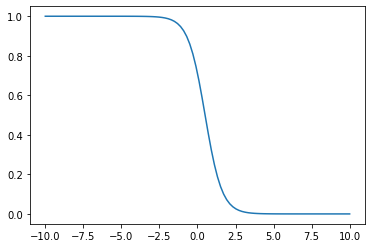

In [17]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.9    #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
# X will iterate and gives a nparray as output
plt.plot(X,Y)
plt.show() 

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+ w_2x_2 + b)}}$

In [18]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [19]:
from mpl_toolkits import mplot3d

In [34]:
w1 = 0.5
w2 = 2
b = 0

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)
Y = sigmoid_2d(XX1,XX2,w1,w2,b)


In [35]:
Y.shape

(100, 100)

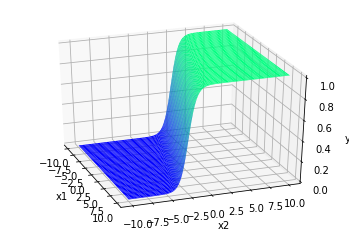

In [41]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(XX1, XX2, Y, cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 360-20)
plt.show()